# Проект исследования данных о продажах компьютерных игр

Для интернет-магазина "Стримчик", который продаёт по всему миру компьютерные игры, по историческим данным из открытых источников о продажах, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation)нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года. Сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».



**Описание данных**

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Раздел №1. Ознакомление и общая информация

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install plotly==5.5.0

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pd.options.mode.chained_assignment = None  # Убрал текст с предупреждением об ошибке

#import plotly.io as pio
#pio.templates.default = "plotly_dark" # Использую темную тему

from scipy import stats as st

from IPython.display import display
import os

Считаем датасет и сохраним в переменную `data`

In [2]:
pth1 = '/content/drive/MyDrive/data/games.csv'
pth2 = 'games.csv'
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [3]:
data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Некоторые игры являются мульти платформенными, например New Super Mario Bros.	и New Super Mario Bros. Wii, 	Grand Theft Auto V	на PS3 и Х360

In [4]:
data.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


В конце датасета игры без рейтинга и практически без продаж, похоже что изначально была сортировка по рейтингу/продажам

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В столбцах с оценками пользователей и рейтингом большое число пропусков

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Проверим на дубликаты по столбцам `Name`, `Platform`, `Year_of_Release`

In [7]:
data[data[['Name', 'Platform', 'Year_of_Release']].duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


С первым значением разберемся при обработке пропусков, а второе - проверим действительно ли значения совпадают по остальным столбцам

In [8]:
data.query('Name == "Madden NFL 13"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Похоже что для платформы PS3 игра `Madden NFL 13` указана два раза, рейтинги совпадают, удалим второе значение

In [9]:
data = data.drop_duplicates(subset=['Name', 'Platform', 'Year_of_Release'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16712 non-null  object 
 1   Platform         16713 non-null  object 
 2   Year_of_Release  16444 non-null  float64
 3   Genre            16712 non-null  object 
 4   NA_sales         16713 non-null  float64
 5   EU_sales         16713 non-null  float64
 6   JP_sales         16713 non-null  float64
 7   Other_sales      16713 non-null  float64
 8   Critic_Score     8136 non-null   float64
 9   User_Score       10013 non-null  object 
 10  Rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


**Вывод:** В датасете представлены данные с 1980 по 2016 год, 11 колонок с характеристиками, 16713 игр.

Обнаружены следующие проблемы:\
`Name` - несколько пропусков\
`Year_of_Release` - дробное число, имеются пропуски\
`Genre` - несколько пропусков\
`Critic_Score` - значительное число пропусков, а также дробный формат\
`User_Score, Rating` - значительное число пропусков


Полные дубликаты обработаны

Большое число пропусков может быть вызвано тем что рейтинги присваиваются не для всех проектов, отбрасывая либо не очень популярные проекты, либо учитывая то что ESRB создана в  Северной америке она и чаще присваивает рейтинги играм выходящим на местном рынке. Либо на этапе выгрузки или при объединении таблиц с данными

## Раздел№2. Подготовьте данные

Для удобства обработки приведем названия колонок в нижний регистр

In [11]:
data.columns = data.columns.str.lower()

In [12]:
data.columns # Проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверим на пропуски

In [13]:
pd.DataFrame({'NaNs, %': round((data.isna().mean()*100),2), 
              'NaNs, qty': data.isna().sum()}).style.format('{:.2f}').background_gradient('coolwarm')

,"NaNs, %","NaNs, qty"
name,0.01,1.00
platform,0.00,0.00
year_of_release,1.61,269.00
genre,0.01,1.00
na_sales,0.00,0.00
eu_sales,0.00,0.00
jp_sales,0.00,0.00
other_sales,0.00,0.00
critic_score,51.32,8577.00
user_score,40.09,6700.00


Обнаружены пропуски, проверим пропуски на зависимости последовательно по столбцам

### `name`

In [14]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Неизвестено ни название игры ни жанр ни оценки с рейтингом, удалим как мало информативные

In [15]:
data = data[data['name'].notna()]

### `user_score`

In [16]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
data.query('user_score == "tbd"').sort_values('na_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.0,0.00,NaN,tbd,E
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
1151,SpongeBob's Atlantis SquarePantis,DS,2007.0,Action,1.49,0.00,0.0,0.11,64.0,tbd,E
1070,Game Party 3,Wii,2009.0,Puzzle,1.40,0.16,0.0,0.12,37.0,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.0,0.06,65.0,tbd,E


Помимо NaN  есть еще значения 'tbd'. To Be Determined - рейтинг не опеределен, данный статус обычно присваивается, если оценок пользователей не достаточно для присвоения какого либо рейтинга. Возможно существует мнимальное количество голосов для выставления рейтинга.

Заменим 'tbd' на  NaN с одновременным преобразование в тип float

In [18]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce').astype('float')

In [19]:
data['user_score'].unique() # Проверка

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### `critic_score`

In [20]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Данные в столбце целые в формате дробных, Прриведем к целым

In [21]:
data['critic_score'] = pd.to_numeric(data['critic_score'], errors='coerce').astype('Int64')
data['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   35,   41,   36,   28,   31,   27,   26,   19,   23,
   24,   21,   17,   22,   13]
Length: 83, dtype: Int64

In [22]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16443.000000,16712.000000,16712.000000,16712.000000,16712.000000,8136.000000,7589.000000
mean,2006.485921,0.263318,0.145053,0.077629,0.047346,68.965954,7.125260
std,5.875546,0.813587,0.503373,0.308880,0.186747,13.938153,1.499989
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Минимальный рейтинг пользовательских оценок 0, посмотрим много ли таких значений

In [23]:
data.query('user_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008.0,Adventure,0.66,0.0,0.0,0.06,<NA>,0.0,E


Одно значение, возможно игра не понравилась пользователям

### `year_of_release`

In [24]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [25]:
data['year_of_release'].isna().sum()

269

Учитывая что пропусков не так много, удаляем

In [26]:
data = data.dropna(subset=['year_of_release'])

In [27]:
data['year_of_release'].isna().sum()

0

Для тех значений восстановить которые не получиться, год выпуска можно попытаться извлечь из названия игры, типа `NFL GameDay 2003`. 

Но учитывая количество незначительное количество можно заполнить пропуски медианой года выпуска игры по поколению консоли

In [28]:
platform_releases = data.pivot_table(
    index='platform', 
    values='year_of_release', 
    aggfunc=['min', 'max', 'median']
    ).droplevel(level=1, axis=1)

platform_releases['years_in_work'] = platform_releases['max'] - platform_releases['min']
platform_releases.sort_values('years_in_work', ascending=False).reset_index()

,platform,min,max,median,years_in_work
0,PC,1985.0,2016.0,2010.0,31.0
1,DS,1985.0,2013.0,2008.0,28.0
2,GB,1988.0,2001.0,1997.0,13.0
3,X360,2005.0,2016.0,2010.0,11.0
4,PSP,2004.0,2015.0,2009.0,11.0
5,PS2,2000.0,2011.0,2005.0,11.0
6,NES,1983.0,1994.0,1986.5,11.0
7,DC,1998.0,2008.0,2000.0,10.0
8,Wii,2006.0,2016.0,2009.0,10.0
9,PS3,2006.0,2016.0,2011.0,10.0


Странные значения для платформ DS и 3DS
Nintendo DS Консоль была выпущена в 2004 году а 
Nintendo 3DS поступила в продажу 26 февраля 2011 года

In [29]:
data.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,<NA>,NaN,NaN


In [30]:
data.query('platform == "3DS" and year_of_release < 2011')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


В консолях есть обратная совместимость, неизвестно как в данных случаях присваиваивается платформа(возможно по последней совместимой версии консоли), но похоже что ошибок не так много и медиана отбросит выбросы

In [31]:
data['year_of_release'].isna().sum() # Проверка

0

In [32]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

Преобразовывать в в формат даты нет необходимости, для целей нашего исследования достаточно оставить как есть.

In [33]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   Int64  
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### `critic_score` 	`user_score` 	`rating`

Посмотрим зависят ли пропуски друг от друга `user_score` и `critic_score`

In [35]:
data[data['user_score'].isna() & data['critic_score'].notna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
182,Tomb Raider II,PS,1997.0,Action,2.30,2.46,0.2,0.28,85,NaN,T
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61,NaN,E10+
440,Need for Speed III: Hot Pursuit,PS,1998.0,Racing,2.14,0.86,0.0,0.13,88,NaN,E
637,Riven: The Sequel to Myst,PC,1997.0,Adventure,1.52,0.82,0.0,0.10,83,NaN,E
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...
16577,Space Raiders,GC,2003.0,Shooter,0.01,0.00,0.0,0.00,40,NaN,T
16669,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,0.01,0.00,0.0,0.00,72,NaN,T
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67,NaN,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53,NaN,E


In [36]:
data[data['user_score'].notna() & data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
255,Call of Duty: Advanced Warfare,PS3,2014.0,Shooter,1.56,1.93,0.19,0.68,<NA>,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014.0,Shooter,2.77,1.11,0.00,0.40,<NA>,4.9,M
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,<NA>,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005.0,Sports,0.12,2.26,0.90,0.77,<NA>,8.2,E
359,Just Dance 2014,Wii,2013.0,Misc,1.88,1.39,0.00,0.31,<NA>,6.2,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16636,Deal or No Deal,PC,2006.0,Misc,0.00,0.01,0.00,0.00,<NA>,7.5,E
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,<NA>,6.6,E
16654,Ben 10 Omniverse 2,X360,2013.0,Action,0.00,0.01,0.00,0.00,<NA>,5.1,E10+
16661,Bookworm Deluxe,PC,2006.0,Puzzle,0.01,0.00,0.00,0.00,<NA>,8.0,E


Попробуем по совпаданию имени заполнить пропуски с рейтингами

In [37]:
data['name'].value_counts().head(10)

Need for Speed: Most Wanted     12
LEGO Marvel Super Heroes         9
FIFA 14                          9
Ratatouille                      9
Angry Birds Star Wars            8
The LEGO Movie Videogame         8
Madden NFL 07                    8
Cars                             8
Lego Batman 3: Beyond Gotham     8
FIFA 15                          8
Name: name, dtype: int64

Самые "мультиплатформенные" игры, посмотрим как распределяются оценки пользователей

In [38]:
data.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,<NA>,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,<NA>,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,<NA>,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45,6.1,E


Помимо мультиплатформеров у нас еще встречаются переиздания, но в целом рейтинги похожи, не учитывая не удачу с платформой DS, заполним медианой, на всякий случай посмотрим еще одну игру

In [39]:
data.query('name == "Ratatouille"')                      

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1598,Ratatouille,DS,2007.0,Action,0.49,0.62,0.0,0.14,<NA>,NaN,NaN
2442,Ratatouille,PS2,2007.0,Action,0.31,0.00,0.0,0.53,65,8.0,E
3069,Ratatouille,PSP,2007.0,Action,0.22,0.27,0.0,0.16,64,7.1,E
3902,Ratatouille,PS3,2007.0,Action,0.09,0.32,0.0,0.10,55,4.8,E
3948,Ratatouille,Wii,2007.0,Action,0.43,0.03,0.0,0.04,62,6.7,E
6398,Ratatouille,X360,2007.0,Action,0.23,0.02,0.0,0.02,56,NaN,E
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65,NaN,E
9015,Ratatouille,GC,2007.0,Action,0.11,0.03,0.0,0.00,60,5.6,E
14514,Ratatouille,PC,2007.0,Action,0.01,0.01,0.0,0.00,<NA>,7.9,E


In [40]:
df = data.groupby('name')['critic_score'].transform('median').astype('Int64')
data['critic_score'] = data['critic_score'].fillna(df)

In [41]:
df = data.groupby('name')['user_score'].transform('median')
data['user_score'] = data['user_score'].fillna(df)

Столбец с `rating` заполним первым значением

In [42]:
df = data.groupby('name')['rating'].transform('first')
data['rating'] = data['rating'].fillna(df)

Большое число пропусков в столбцах `user_score` и `critic_score`, заполнить, без потери качества данных, можно только из сторонних источников.

Добавим столбец с суммой продаж по всем регионах

In [43]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [44]:
data.sort_values('all_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,None,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,None,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,None,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,None,28.31


In [45]:
data.sort_values('all_sales', ascending=False).tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16177,Destiny Links,DS,2009.0,Role-Playing,0.00,0.0,0.01,0.0,<NA>,NaN,None,0.01
16178,Egg Mania: Eggstreme Madness,XB,2002.0,Puzzle,0.01,0.0,0.00,0.0,58,8.0,E,0.01
16179,Pro Angler Moves,PS3,2012.0,Sports,0.01,0.0,0.00,0.0,<NA>,NaN,E,0.01
16181,Sakura Sakura: Haru Urara,PSP,2010.0,Adventure,0.00,0.0,0.01,0.0,<NA>,NaN,None,0.01
16182,Rocksmith 2014 Edition Remastered,XOne,2016.0,Misc,0.01,0.0,0.00,0.0,<NA>,7.8,T,0.01
16183,Uta no * Prince-Sama: Sweet Serenade,PSP,2011.0,Adventure,0.00,0.0,0.01,0.0,<NA>,NaN,None,0.01
16184,Higurashi no Naku Koro ni Iki,PS3,2015.0,Action,0.00,0.0,0.01,0.0,<NA>,NaN,None,0.01
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.0,0.01,0.0,<NA>,NaN,None,0.01
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.00,0.0,0.00,0.0,<NA>,NaN,None,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.0,0.00,0.0,<NA>,NaN,None,0.00


Проверим что у нас осталось

In [47]:
pd.DataFrame({'NaNs, %': round((data.isna().mean()*100),2), 
              'NaNs, qty': data.isna().sum()}).style.format('{:.2f}').background_gradient('coolwarm')

,"NaNs, %","NaNs, qty"
name,0.00,0.00
platform,0.00,0.00
year_of_release,0.00,0.00
genre,0.00,0.00
na_sales,0.00,0.00
eu_sales,0.00,0.00
jp_sales,0.00,0.00
other_sales,0.00,0.00
critic_score,45.75,7522.00
user_score,48.17,7920.00


## Раздел№3. исследовательский анализ данных

### Проверим сколько игр выпускалось в разные годы. И насколько важны данные за все периоды?

In [51]:
fig = px.histogram(data, x="year_of_release")
fig.update_layout(bargap=0.05, 
                  title_text='Количество проданых игр в год',
                  xaxis_title_text='Год',
                  yaxis_title_text='Количество, млн')
fig.show()

В целом данные по количеству выпущенных игр отражают историю развития компьютерных технологий и их распостранение в обществе.
* 1980 - 1994 компьютер это вычислительная техника,  мало распостранен, игры в 2д
* 1994 - 2001 c 1995 начинается рост производства игр, связанный с появлением операционных систем с графическим интерфейсом, компьютеры становятся популярнее, появляются все основные жанры, создаются новые игровые механики
*2002 - 2009 стремительный рост производства игр, скорее всего связанный с распространением интернета, в этот период появляются самые популярные онлайн игры
*2009 - 2011 резкий спад, связанный скорее всего с остаточным влиянием кризиса 2008 года, с расцветом популярности социальных сетей так как  часть разработки идет на внутреннем api,  и конечно же, начало массового производства мобильных игр на платформах Android и IOS, данных по которым в нашем датасете нет
*2012 - 2016 показатели консолидировались после спада на отметах 550-600, и вероятнее всего остальной рынок остается за мобильной разработкой

**Вывод:** Для дальнейшего исследования возьмем период консолидации с 2013 года, год выхода приставок нового поколения PS4 и XOne

### Посмотрим, как менялись продажи по платформам.

In [52]:
platforms_uniq = data['platform'].unique()

platforms_sales_years = data.pivot_table(index='year_of_release', values='all_sales', columns='platform', aggfunc='sum').reset_index()

for platform in platforms_uniq:
    fig = px.bar(platforms_sales_years, x='year_of_release', y=platform, range_x=(1978, 2018), range_y=None)
    fig.update_layout(title_text=platform,
                      xaxis_title_text='Год',
                      yaxis_title_text='Продано игр, млн.',
                      width=600, height=400)
    fig.show()

Практически на всех платформах бурный рост продаж первые несколько лет, пик, и такой же резкий спад. Период пиковых продаж редко превышает 2-3 года. Развитие технологий и конкуренция оказывают сильное влияние

Если сравнить по динамике например PS3 и PS4 преодолели 100 млн. копий на третий год существования приставок. Xbox 360 также практически набрала 100 млн. копий на третий год. Пик продаж приходится 175 млн. у X360 и 162 млн. у PS3.\
А вот XOne с трудом набрала 60 млн. Даже если учесть факт того что Microsoft сделала кросплатформенность с PC, резкого роста продаж на PC тоже не видно. Судя по этим данным дела с продажами у Microsoft стоят хуже.

In [53]:
platform_all_sales = data.pivot_table(index='platform', 
                                      values='all_sales', 
                                      aggfunc='sum').sort_values('all_sales', ascending=False).reset_index()

fig = px.histogram(platform_all_sales, x='platform', y='all_sales')
fig.update_layout(bargap=0.05, 
                  title_text='Продано игр по платформам',
                  xaxis_title_text='Платформа',
                  yaxis_title_text='Количество игр, млн.')
fig.show()

На момент среза 6 платформ выделяются по количеству выпущенных игр среди остальных. Приставки нового поколения не попали в топ.
А PS2 значительно опередила PS3.

In [54]:
top_sales_platform = platform_all_sales.iloc[:6]
top_sales_platform

,platform,all_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58


Построим распределение продаж по топ-6 платформам

In [55]:
platforms_sales_years = data.pivot_table(index='year_of_release', 
                                         values='all_sales', 
                                         columns='platform', 
                                         aggfunc='sum').reset_index()

for platform in top_sales_platform['platform'].unique():
    fig = px.bar(platforms_sales_years, 
                 x='year_of_release', 
                 y=platform, 
                 range_x=(1992, 2018), 
                 range_y=(0, 250))
    fig.update_layout(title_text=platform,
                      xaxis_title_text='Год',
                      yaxis_title_text='Продано игр, млн.')
    fig.show()

Посмотрим в какой период выпускались игры для каждой платформы

In [56]:
platform_years = data.pivot_table(index='platform', 
                                  values='year_of_release', 
                                  aggfunc=['min', 'max']).droplevel(level=1, axis=1)
platform_years['years_in_work'] = platform_years['max'] - platform_years['min']
platform_years.sort_values('platform', ascending=False).reset_index()

,platform,min,max,years_in_work
0,XOne,2013.0,2016.0,3.0
1,XB,2000.0,2008.0,8.0
2,X360,2005.0,2016.0,11.0
3,WiiU,2012.0,2016.0,4.0
4,Wii,2006.0,2016.0,10.0
5,WS,1999.0,2001.0,2.0
6,TG16,1995.0,1995.0,0.0
7,SNES,1990.0,1999.0,9.0
8,SCD,1993.0,1994.0,1.0
9,SAT,1994.0,1999.0,5.0


In [57]:
platform_years.years_in_work.median()

6.0

Медианное время жизни приставок по данным из датасета 8 лет. 
Но необходимо учитывать и то что период существования приставок разных поколений одно производителя перекрывается, тоесть появляется новая а старая еще поддерживается несколько лет.

### Выберем актуальный период для построения прогноза на 2017 год


На основе выводов полученных ранее выберем период с 2013 года

In [58]:
data_actual = data.query('year_of_release >= 2013')
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,None,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,None,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


In [59]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     1321 non-null   Int64  
 9   user_score       1364 non-null   float64
 10  rating           1376 non-null   object 
 11  all_sales        2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


In [60]:
data_actual.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,1321.00000,1364.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,71.91673,6.600477,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,13.41310,1.608507,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,13.00000,0.200000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,66.00000,5.750000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,74.00000,7.000000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,81.00000,7.800000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.00000,9.300000,21.050000


### Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

Посмотрим какие платформы остались 

In [61]:
data_actual.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Посмотрим на динамику продаж по каждой платформе

In [62]:
actual_platforms_sales_years = data_actual.pivot_table(index='year_of_release', values='all_sales', columns='platform', aggfunc='sum').reset_index()

for platform in data_actual.platform.unique():
    fig = px.bar(actual_platforms_sales_years, x='year_of_release', y=platform, range_x=(2012, 2017), range_y=None)
    fig.update_layout(title_text=platform,
                      width=600, 
                      height=400,
                      xaxis_title_text='Год',
                      yaxis_title_text='Продано игр, млн.')
    fig.show()

Учитываем условие, что за 2016 год данные могут не полными. 

Рост продаж показывают только две платформы - консоли последнего поколения XboxOne и PS4. Продажи для консолей предыдущего поколения X360, PS3 и портативные PSP, PSV постепенно снижаются как и продажи для консолей компании Nintendo - портативных Ds, 3ds и настольных семейства Wii.

На основании полученных результатов рекомендуется выбрать консоли последнего поколения XOne и PS4.

In [63]:
fig = px.box(data_actual, x="platform", y="all_sales", range_y=(0,2.5))
fig.update_layout(title_text='Продажам игр в разбивке по платформам',
                  width=900, 
                  height=700,
                  xaxis_title_text='Платформа',
                  yaxis_title_text='Продано игр, млн.')
fig.show()

Диаграмма размаха показывает что, больший объем продаж отдельной игры на платформах X360 и Wii. На приставках нового поколения XOne, PS4 данные еще не окончательные, предыдущее поколение отработало 11 лет, а новые платформы только 3 года

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [64]:
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     1321 non-null   Int64  
 9   user_score       1364 non-null   float64
 10  rating           1376 non-null   object 
 11  all_sales        2233 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 229.0+ KB


In [65]:
corr_matrix = data_actual[['critic_score', 'user_score', 'all_sales']].corr().round(2)
    
fig = px.imshow(corr_matrix,
                text_auto=True,
                width=500, 
                height=500,
                color_continuous_scale='Hot')
    
fig.update_xaxes(side="top")
fig.update_layout(title="Корреляция оценок и количества проданных копий ")
fig.show()

Общая корреляция оценок и продаж:
- есть слабая зависимость между оценками критиков и количеством продаж
- зависимость между оценками пользователей и продажами отсутствует

Посмотрим теперь по каждой платформе

In [66]:
def two_scatter_one_corr(platform):
    '''
    Функция строит точечные диаграммы для оценок пользователей и критиков
    и корреляционную матрицу ним же с тепловым градиентом, в зависимости 
    от выбранной платформы
    '''
        
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(
        go.Scatter(x=data_actual.query('platform == @platform')['user_score'].dropna(), 
                   y=data_actual.query('platform == @platform')['all_sales'].dropna(),
                   mode='markers',
                   marker_color="red"),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=data_actual.query('platform == @platform')['critic_score'].dropna(), 
                  y=data_actual.query('platform == @platform')['all_sales'].dropna(),
                  mode='markers',
                  marker_color="green"),
        row=1, col=2
    )

    fig.update_layout(title=platform,
                      showlegend=False,
                      height=400,)

    fig.update_yaxes(title_text="Продажи, млн", row=1, col=1)
    fig.update_xaxes(title_text="Оценки пользователей", row=1, col=1)
    fig.update_yaxes(title_text="Продажи, млн", row=1, col=2)
    fig.update_xaxes(title_text="Оценки критиков", row=1, col=2)

    fig.show()

    corr_matrix = data_actual.query('platform == @platform')[['critic_score', 'user_score', 'all_sales']].corr().round(2)
    
    fig = px.imshow(corr_matrix,
                    text_auto=True,
                    width=500, 
                    height=500,
                    color_continuous_scale='Hot')
    
    fig.update_xaxes(side="top")
    fig.update_layout(title="Матрица корреляции оценок и продаж")
    fig.show()

In [67]:
data_actual.platform.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [68]:
two_scatter_one_corr("PS3")

Для PS3
- слабая зависимость между оценками критиков и количеством продаж
- зависимость между оценками пользователей и продажами отсутствует

In [69]:
two_scatter_one_corr("X360")

Для X360
- слабая зависимость между оценками критиков и количеством продаж
- зависимость между оценками пользователей и продажами отсутствует

In [70]:
two_scatter_one_corr('PS4')

Для PS4
- умеренная зависимость между оценками критиков и количеством продаж
- зависимость между оценками пользователей и продажами отсутствует

In [71]:
two_scatter_one_corr("3DS")

Для 3DS
- умеренная зависимость между оценками критиков и количеством продаж
- слабая зависимость между оценками пользователей и продажами

In [72]:
two_scatter_one_corr("DS")

Для DS
- средняя зависимость между оценками критиков и количеством продаж
- зависимость между оценками пользователей и продажами отсутствует\
но количества данных в выборке не достаточно для достоверной оценки

In [73]:
two_scatter_one_corr("XOne")

Для XOne
- умеренная зависимость между оценками критиков и количеством продаж
- зависимость между оценками пользователей и продажами отсутствует

In [74]:
two_scatter_one_corr("WiiU")

Для WiiU
- умеренная зависимость между оценками критиков и количеством продаж
- умеренная зависимость между оценками пользователей и продажами\
один из лучших результатов корреляции

In [75]:
two_scatter_one_corr("Wii")

Для Wii
- умеренная зависимость между оценками критиков и количеством продаж
- умеренная зависимость между оценками пользователей и продажами, но данных не так много

In [76]:
two_scatter_one_corr("PC")

Для PC
- слабая зависимость между оценками критиков и количеством продаж
- слабая отрицательная зависимость между оценками пользователей и продажами

In [77]:
two_scatter_one_corr("PSV")

Для PSV
- слабая зависимость между оценками критиков и количеством продаж
- зависимость между оценками пользователей и продажами отсутствует

In [78]:
two_scatter_one_corr("PSP")

Для PSP
количества данных в выборке не достаточно для достоверной оценки

### Посмотрим на общее распределение игр по жанрам. Найдем самые прибыльные жанры

In [79]:
genre_all_sales = data_actual.pivot_table(index='genre', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False)

fig = px.bar(genre_all_sales, text_auto=True)
fig.update_layout(bargap=0.3, 
                  title_text='Продажи игр по жанрам',
                  xaxis_title_text='Жанр',
                  yaxis_title_text='Количество игр, млн.')
fig.show()

Самый покупаемый жанр по всем платформам это Action за ним следуют Shooter, RPG и спортивные игры. На последнем месте стратегии и пазлы

In [80]:
genre_all_sales_platform = data_actual.pivot_table(index='genre', values='all_sales', columns='platform', aggfunc='sum').fillna(0)
genre_all_sales_platform.style.format('{:.2f}').background_gradient('RdYlBu_r')

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,34.04,0.50,7.26,70.92,96.10,0.86,9.72,2.82,14.75,47.59,37.31
Adventure,3.33,0.03,0.51,4.32,6.34,0.71,3.45,0.18,0.17,1.92,2.68
Fighting,8.21,0.00,0.10,6.05,8.65,0.02,1.19,0.00,6.09,2.55,2.45
Misc,7.10,0.08,0.71,8.36,8.19,0.17,3.85,7.06,7.38,12.49,7.43
Platform,8.79,0.69,0.07,3.33,7.69,0.00,0.47,2.25,16.27,2.14,0.93
Puzzle,1.73,0.00,0.00,0.04,0.02,0.00,0.06,0.00,1.32,0.00,0.00
Racing,0.00,0.00,0.97,6.46,12.14,0.00,0.10,0.00,7.36,3.07,9.79
Role-Playing,67.37,0.00,4.87,16.49,28.99,1.03,10.23,0.00,1.93,4.43,10.55
Shooter,0.06,0.00,9.84,31.79,88.56,0.00,1.44,0.00,5.48,35.48,60.33


Можно заметить что игры некоторых жанров имеют успех только на определенных платформах. Например RPG на 3DS\
Другие жанры более универсальны такие как Action - хорошие продажи практически на всех платформах.
Для выбранных ранее XOne и PS4 хорошим спросом полльзуются Action, Shooter, Sport. Практически не продаются Puzzle, Strategy, Simulation, для XOne еще и Platform

Можно попробывать сгрупировать по типу приставки и по производителю. Тип приставки определяет те или иные удобства для игр опрделенного жанра. А разделение продаж по производителя повлияют серии эксклюзивов

In [81]:
genre_all_sales_platform['portable'] = genre_all_sales_platform['3DS'] + genre_all_sales_platform['DS'] + genre_all_sales_platform['PSP'] + genre_all_sales_platform['PSV']
genre_all_sales_platform['desktop'] = genre_all_sales_platform['PS3'] + genre_all_sales_platform['X360'] + genre_all_sales_platform['PS4'] + genre_all_sales_platform['XOne'] + genre_all_sales_platform['WiiU'] + genre_all_sales_platform['Wii']+ genre_all_sales_platform['PC']
genre_all_sales_platform['sony'] = genre_all_sales_platform['PSP'] + genre_all_sales_platform['PSV'] + genre_all_sales_platform['PS3'] + genre_all_sales_platform['PS4']
genre_all_sales_platform['microsoft'] = genre_all_sales_platform['X360'] + genre_all_sales_platform['XOne'] + genre_all_sales_platform['PC']
genre_all_sales_platform['nintendo'] = genre_all_sales_platform['3DS'] + genre_all_sales_platform['DS'] + genre_all_sales_platform['WiiU'] + genre_all_sales_platform['Wii']

genre_all_sales_platform[['portable', 'desktop', 'sony', 'microsoft', 'nintendo']].style.format('{:.2f}').background_gradient('RdYlBu_r')

platform,portable,desktop,sony,microsoft,nintendo
genre,,,,,
Action,45.12,276.75,177.60,92.16,52.11
Adventure,7.52,16.12,14.82,5.11,3.71
Fighting,9.42,25.89,15.91,5.10,14.30
Misc,11.20,51.62,20.57,20.63,21.62
Platform,9.95,32.68,11.49,3.14,28.00
Puzzle,1.79,1.38,0.12,0.00,3.05
Racing,0.10,39.79,18.70,13.83,7.36
Role-Playing,78.63,67.26,56.74,19.85,69.30
Shooter,1.50,231.48,121.79,105.65,5.54


На портативные платформы пользователи чаще покупают RPG а реже всего Shooter
На desktop покупают чаще жанр Action реже Puzzle.
Sony и Microsoft похожи, у обеих компаний в топе Action и Shooter а самые низки продажи у  Puzzle. 
У платформ Nintendo из-за популярности портативных версий приставок лидирует жанр RPG, а жанр с самыми низкими продажами Strategy

Так же отобразим диаграммы размаха продаж игр по жанрам

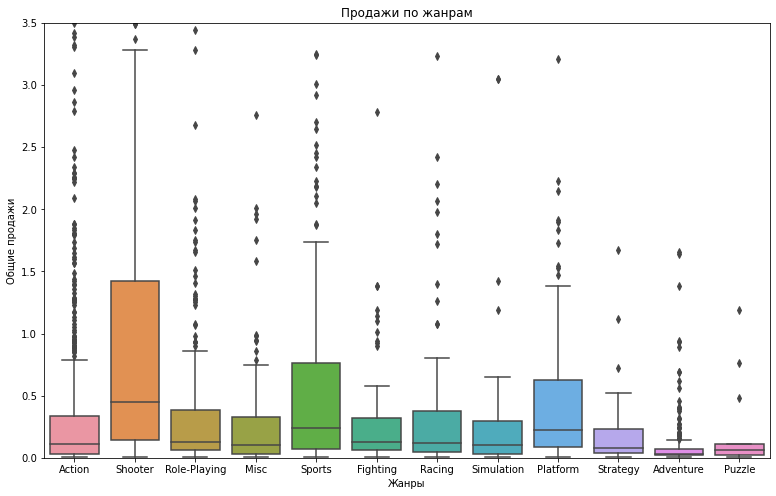

In [99]:
# Комментарий ревьюера 2
import seaborn as sns
data_temp, y = data_actual, 'all_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

**Вывод:**
На основании распределения продаж выбран актуальный период с 2013 года.\
Выбраны две актуальные платформы с растущими продажами XOne и PS4\
Проверили и установили что между продажами игр и оценками критиков слабая зависимость, а между продажами и оценками пользователей зависимость практически отсутствует

## Раздел№4. Составьте портрет пользователя каждого региона
Определим типичного пользователя для каждого региона (NA, EU, JP):

In [83]:
data_actual['rating'].unique()

array(['M', None, 'E', 'T', 'E10+'], dtype=object)

* «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Первоначально "K-A" ("Kids to Adults")
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
* «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.

In [84]:
data['rating'].unique()

array(['E', None, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Вне выбранного периода, в датасете встречаются еще
* «AO» («Adults Only 18+») — «Только для взрослых»
* «EC» («Early childhood») — «Для детей младшего возраста»
* «RP» («Rating Pending») — «Рейтинг ожидается» Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

Отсутствие этих рейтингов в актуальном периоде может означать, либо игры с данными рейтингами не выпускались, либо они учтены в других категориях, возможно из-за измений в системе оценки, в том числе и в данных None

Чтобы учесть их присвоим значениям None рейтинг "N"

In [85]:
data_actual['rating'] = data_actual['rating'].fillna('N')

In [86]:
data_actual.pivot_table(index='rating', values='all_sales', aggfunc='sum')

,all_sales
rating,
E,206.36
E10+,121.06
M,390.98
N,238.81
T,133.48


Определим самые популярные платформы, самые популярные жанры и распределение по рейтингам ESRB для каждого региона продаж

In [87]:
def two_pie(region):
    '''
    '''
    # Таблицы для построения диаграмм
    platform_allsales = data_actual.pivot_table(index='platform', 
                                                values=region, 
                                                aggfunc='sum')\
                                   .reset_index()\
                                   .sort_values(region, ascending=False) 


    genre_allsales = data_actual.pivot_table(index='genre', 
                                             values=region, 
                                             aggfunc='sum')\
                                .reset_index()\
                                .sort_values(region, ascending=False)
    
       
    rating_allsales = data_actual.pivot_table(index='rating', 
                                              values=region, 
                                              aggfunc='sum')\
                                 .reset_index()\
                                 .sort_values(region, ascending=False)
    
    # Незначительные доли в одну категорию
    platform_allsales.iloc[5:]['platform'] = 'Other platform'
    genre_allsales.iloc[5:]['genre'] = 'Other genre'
    
    # Построение круговых и столбчатой диаграмм 
    fig = make_subplots(rows=1, 
                        cols=3, 
                        specs=[[{"type": "pie"}, 
                                {"type": "pie"}, 
                                {"type": "bar"}]],
                        subplot_titles=("Продажи игр по платформам", 
                                        "Продажи игр по жанрам", 
                                        "Продажи игр по рейтингу ESRB"))
 
    fig.add_trace(go.Pie(labels=platform_allsales['platform'], 
                         values=platform_allsales[region]), 
                  row=1, 
                  col=1)

    fig.add_trace(go.Pie(labels=genre_allsales['genre'], 
                         values=genre_allsales[region]),
                  row=1, 
                  col=2)
    
    fig.update_traces(textposition='inside', 
                      textinfo='percent+label', 
                      showlegend=False)
    

    fig.add_trace(go.Bar(x=rating_allsales['rating'], 
                         y=rating_allsales[region]), 
                  row=1, 
                  col=3)
    
    fig.update_layout(bargap=0.3,
                      xaxis_title_text='Рейтинг ESRB',
                      yaxis_title_text='Количество игр, млн.',
                      showlegend=False)


    fig.show()

In [88]:
two_pie('na_sales')

Портрет пользователя Северной Америки:
- Основная платформа практически поровну, но чаще PS4 чем XOne
- Любимый жанр Action либо Shooter
- Возрастной рейтинг старше 17 лет

In [89]:
two_pie('eu_sales')

Портрет европейского пользователя:
- Основная платформа PS4
- Любимый жанр Action либо Shooter
- Возрастной рейтинг старше 17 лет

In [90]:
two_pie('jp_sales')

Портрет пользователя в Японии:
- Основная платформа 3DS, почти половина рынка
- Любимый жанр RPG с небольшим отставанием Action
- Возрастной рейтинг N, тоесть те игры ретинг которым не присвоен ESRB

Вывод: 
Портреты пользователя в Европе и СА очень похожи в выборе платформы PS4 и жанров Action и Shooter. 
Отличия в приставках Microsoft. В Северной Америке на втором месте по популярности,  в Европе на третьем, в Японии не попали в топ 5.

Рейтинг N в Северной Америке  в большинстве магазинов считается как 18+ и требует документов, при покупке игры.

И в Европе и в Японии существуют свои рейтинговые агенства в Европе PEGI а в Японии CERO. Возможно поэтому в Японии большая часть игр продается без рейтинга ESRB.

## Раздел№5. Проверьте гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;\
Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Посмотрим на количество, среднее, дисперсию и стандартное отклонение

In [91]:
df_xone_vs_pc = pd.DataFrame({
    'Количество': [data_actual.query('platform == "XOne"')['user_score'].dropna().count(), 
                 data_actual.query('platform == "PC"')['user_score'].dropna().count()],
     
    'Среднее': [data_actual.query('platform == "XOne"')['user_score'].dropna().mean(), 
                 data_actual.query('platform == "PC"')['user_score'].dropna().mean()],
     
    'Дисперсия': [np.var(data_actual.query('platform == "XOne"')['user_score'].dropna(), ddof=1), 
                   np.var(data_actual.query('platform == "PC"')['user_score'].dropna(), ddof=1)],
     
    'Стандартное отклонение': [np.std(data_actual.query('platform == "XOne"')['user_score'].dropna(), ddof=1), 
                                np.std(data_actual.query('platform == "PC"')['user_score'].dropna(), ddof=1)]
     }, index=['XOne', 'PC'])

display(df_xone_vs_pc.round(2))

,Количество,Среднее,Дисперсия,Стандартное отклонение
XOne,205,6.61,1.89,1.37
PC,157,6.26,3.05,1.75


Посмотрим как распределны оценки

In [92]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=data_actual.query('platform == "XOne"')['user_score'],
                           histnorm='percent',
                           xbins=dict(start=1, 
                                      end=10, 
                                      size=1),
                           name='XOne'))

fig.add_trace(go.Histogram(x=data_actual.query('platform == "PC"')['user_score'],
                           histnorm='percent',
                           xbins=dict(start=1, 
                                      end=10, 
                                      size=1),
                           name='PC'))


fig.update_layout(    
                  title_text='Сравнение оценок пользователей XOne и РС',
                  xaxis_title_text='Оценка',
                  yaxis_title_text='%',
                  bargap=0.2,
                  bargroupgap=0.1
                  )

fig.show()

Пользователи PC чаще ставят оценки от 1 до 4

In [93]:
alpha = 0.01 # Выборка довольно большая, примем 0.01

results = st.ttest_ind(data_actual.query('platform == "XOne"')['user_score'].dropna(), 
                       data_actual.query('platform == "PC"')['user_score'].dropna(), equal_var = False)

print(results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.038056752824864336
Не получилось отвергнуть нулевую гипотезу


Следовательно, нулевая гипотеза верна

Проверим следующую гипотезу:\
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые;

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

Посмторим на количество, среднее, дисперсию и стандартное отклонение

In [94]:
df_xone_vs_pc = pd.DataFrame({
    'Количество': [data_actual.query('genre == "Action"')['user_score'].dropna().count(), 
                 data_actual.query('genre == "Sports"')['user_score'].dropna().count()],
     
    'Среднее': [data_actual.query('genre == "Action"')['user_score'].dropna().mean(), 
                 data_actual.query('genre == "Sports"')['user_score'].dropna().mean()],
     
    'Дисперсия': [np.var(data_actual.query('genre == "Action"')['user_score'].dropna(), ddof=1), 
                   np.var(data_actual.query('genre == "Sports"')['user_score'].dropna(), ddof=1)],
     
    'Стандартное отклонение': [np.std(data_actual.query('genre == "Action"')['user_score'].dropna(), ddof=1), 
                                np.std(data_actual.query('genre == "Sports"')['user_score'].dropna(), ddof=1)]
     }, index=['Action', 'Sports'])

display(df_xone_vs_pc.round(2))

,Количество,Среднее,Дисперсия,Стандартное отклонение
Action,453,6.85,1.77,1.33
Sports,180,5.18,3.05,1.75


Посмотрим на распределение рейтингов

In [95]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=data_actual.query('genre == "Action"')['user_score'], 
                           histnorm='percent',
                           xbins=dict(start=1, 
                                      end=10, 
                                      size=1),
                           name='Action'))

fig.add_trace(go.Histogram(x=data_actual.query('genre == "Sports"')['user_score'],
                           histnorm='percent',
                           xbins=dict(start=1, 
                                      end=10, 
                                      size=1),
                           name='Sports'))


fig.update_layout(    
                  title_text='Сравнение оценок пользователей Action и Sports',
                  xaxis_title_text='Оценка',
                  yaxis_title_text='%',
                  bargap=0.2,
                  bargroupgap=0.1
                  )

fig.show()

Игры жанрам Sport значительно опережают по низким оценкам игры жанра Action

In [96]:
alpha = 0.01

results = st.ttest_ind(data_actual.query('genre == "Action"')['user_score'].dropna(), 
                       data_actual.query('genre == "Sports"')['user_score'].dropna(), 
                       equal_var = False)

print(results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.078555165233204e-25
Отвергаем нулевую гипотезу


**Вывод:**

Гипотеза о том что средние пользовательские рейтинги платформ Xbox One и PC одинаковые подтверждена.

Гипотеза о том что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные подтвеждена.

## ВЫВОД:

Нами проведено исследование данных о продажах игр с 1980 по 2016 год для планирования рекламной компании интернет-магазина игр на 2017 год.

На этапе подготовки данных привели к удобным для исследования форматам данные столбцов, обнаружили большое число пропусков в столбцах с оценками пользователей и рейтингами ESRB.

При подготовке данных обработали и восстановили некоторую часть пропусков. 
Преобразовали  значения не установленного рейтинга 'tbd'


В процессе исследования установили, что количество продаваемых компьютерных игр 
интесивно росло с 1994 по 2008, далее произошел спад. Этот спад 
предположительно, как раз совпал с началом расцвета игр для мобильных платформ 
Android и IOS. И примерно с 2012 года продажи остаются около уровня 550-600 млн копий в год.


Также удалось выявить что период жизни платформы около 8 лет, 
при этом практически каждые 5 лет появляется новое поколение (исключение PC, но период обновления комплектующих для игры в актуальные игры наверняка будет близко к этому сроку), а продажи игр для старого сразу падают.

Выявили что динамика продаж XOne значительно отстает от PS4. Но обе платформы показывают рост за последние 3 года

Для исследования выбран период с 2013 года, после выхода платформ нового поколения XOne и PS4. Которые на ближайшие несколько лет будут основными платформами для выпуска игр.
Брать период меньше для получения наиболее актуальных данных не стоит так как сильно снизиться размер выборки и качество статистических данных.


Установили что в основном зависимость между отзывами пользователей
 и продажами игр отсутствует, а  отзывы критиков слабо коррелируют с продажами.
Предположительно пользователи покупают не смотря на отзывы, возможно ориентируясь на другие факторы, например реклама, обзоры, известность серии.

Самыми продаваемыми  жанрами являются Action и Shooter. 3 и 4 место делят RPG и Sports

Определили, что такие жанры как RPG чаще покупают на платформах 3DS
чем на остальных. Возможно из-за лучшей адаптации платформы к игре в таки жанры,
 либо из-за популярных эксклюзивных проектов выходящих только на одной платформе.
А такой жанр как Action популярен практически на всех приставках.

Составили портрет пользователей по регионам:

- Северная Америка:
Основные платформы PS4 и XOne
Жанры Action либо Shooter
Возрастной рейтинг старше 17 лет

- Европа:
Основная платформа PS4
Любимый жанр Action либо Shooter
Возрастной рейтинг старше 17 лет

- Япония:
Основная платформа 3DS, почти половина рынка
Любимый жанр RPG с небольшим отставанием Action
Возрастной рейтинг не присвоен ESRB

Продажи игр для приставок от Microsoft XOne в Северной Америке 
на втором месте по популярности, в Европе на третьем, в Японии не попали в топ 5. PS4 на первом месте в Северной Америке и Европе и на втором в Японии

Также необходимо учесть что организация ESRB изначально создана в США для определения рейтинга игр в США и Канаде. В Европе есть свое рейтинговое агенство PEGI а в Японии CERO.
Это может объяснить почему в портрете пользователя из Японии топ составляют игры без рейтинга

Подтверждены две гипотезы:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
и средние пользовательские рейтинги жанров Action различаются.
